In [1]:
%xmode plain
%matplotlib inline
import pandas, sqlalchemy

Exception reporting mode: Plain


# Pandas: Analysis and Visualization

- [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)

Load a data frame:

In [2]:
df = pandas.read_csv('data/red_wine.csv', delimiter=';')

## Indexing

To retrieve a column, we use square brackets, similar to indexing a dictionary.

In [3]:
df['chlorides']

0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
5       0.075
6       0.069
7       0.065
8       0.073
9       0.071
10      0.097
11      0.071
12      0.089
13      0.114
14      0.176
15      0.170
16      0.092
17      0.368
18      0.086
19      0.341
20      0.077
21      0.082
22      0.106
23      0.084
24      0.085
25      0.080
26      0.080
27      0.106
28      0.080
29      0.082
        ...  
1569    0.056
1570    0.230
1571    0.038
1572    0.069
1573    0.075
1574    0.074
1575    0.060
1576    0.081
1577    0.076
1578    0.118
1579    0.053
1580    0.068
1581    0.053
1582    0.053
1583    0.074
1584    0.061
1585    0.066
1586    0.065
1587    0.066
1588    0.068
1589    0.073
1590    0.077
1591    0.089
1592    0.076
1593    0.068
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, dtype: float64

The output value is itself a `DataFrame`.

We can retrieve multiple columns as well by nesting the column names inside a list:

In [4]:
df[['chlorides', 'volatile acidity']]

,chlorides,volatile acidity
0,0.076,0.700
1,0.098,0.880
2,0.092,0.760
3,0.075,0.280
4,0.076,0.700
5,0.075,0.660
6,0.069,0.600
7,0.065,0.650
8,0.073,0.580
9,0.071,0.500


To retrieve selected rows, we can use a slice, just like slicing a list or a string:

In [5]:
df[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


However, in Pandas, you cannot use a single integer to retrieve a single row (which I find confusing):

In [6]:
# error:
# df[0]

Instead, I would do the following:

In [7]:
df[0:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


You can filter by columns and rows simultaneously:

In [8]:
df[['chlorides', 'volatile acidity']][:3]

,chlorides,volatile acidity
0,0.076,0.70
1,0.098,0.88
2,0.092,0.76


## Filter by Binary Masking

When making a logical comparison between a `DataFrame` and a single number, the result is a *binary mask*.

A binary mask is itself a `DataFrame` containing Boolean values (`True` or `False`) comparing each element of the data frame with the other number:

In [9]:
df['chlorides'] <= 0.08

0        True
1       False
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25       True
26       True
27      False
28       True
29      False
        ...  
1569     True
1570    False
1571     True
1572     True
1573     True
1574     True
1575     True
1576    False
1577     True
1578    False
1579     True
1580     True
1581     True
1582     True
1583     True
1584     True
1585     True
1586     True
1587     True
1588     True
1589     True
1590     True
1591    False
1592     True
1593     True
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, dtype: bool

The binary mask can be used to *index* the data frame. The following returns all rows whose `chlorides` values is less than 0.08.

In [10]:
df[df['chlorides'] <= 0.08]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


The ampersand, `&`, performs a logical-AND, i.e. an intersection, between each condition:

In [11]:
df[(df['chlorides'] >= 0.075) & (df['chlorides'] <= 0.080)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.40,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.40,6
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.30,5
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.50,5
28,7.1,0.710,0.00,1.9,0.080,14.0,35.0,0.99720,3.47,0.55,9.40,5
58,7.8,0.590,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.00,5
60,8.8,0.400,0.40,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.20,5


The pipe, `|`, performs a logical-OR, i.e. a union, between each condition:

In [12]:
df[(df['chlorides'] < 0.075) | (df['chlorides'] > 0.080)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.40,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.20,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.90,5
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.10,5


You could include conditions with multiple fields:

In [13]:
df[(df['chlorides'] > 0.100) & (df['pH'] < 3.20)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
27,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
54,7.6,0.510,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2,6
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6


## Filter by `query` method

- [Pandas documentation: `query`](http://pandas.pydata.org/pandas-docs/stable/indexing.html#the-query-method-experimental)
- [Pandas API reference: `query`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html)

The `query` method provides another way to filter a `DataFrame` similar to the binary mask above.

In [14]:
df.query('chlorides > 0.100 and pH < 3.20')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
27,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
54,7.6,0.510,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2,6
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6


## Groupby

- [Pandas documentation: Group By](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

`groupby` allows us to perform *aggregations* such as sums, means, or counts.

Let's find the unique values in the `quality` column throughout the data frame.

In [15]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Create a `GroupBy` object:

In [16]:
gb = df.groupby('quality')

In [17]:
gb

For each quality level, find the mean, max, or count of the other columns:

In [18]:
gb.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [19]:
gb.max()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,11.6,1.580,0.66,5.7,0.267,34.0,49.0,1.00080,3.63,0.86,11.0
4,12.5,1.130,1.00,12.9,0.610,41.0,119.0,1.00100,3.90,2.00,13.1
5,15.9,1.330,0.79,15.5,0.611,68.0,155.0,1.00315,3.74,1.98,14.9
6,14.3,1.040,0.78,15.4,0.415,72.0,165.0,1.00369,4.01,1.95,14.0
7,15.6,0.915,0.76,8.9,0.358,54.0,289.0,1.00320,3.78,1.36,14.0
8,12.6,0.850,0.72,6.4,0.086,42.0,88.0,0.99880,3.72,1.10,14.0


In [20]:
gb.count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


The result of the above methods are `DataFrame` objects. That means that you can index the result like any other `DataFrame`:

In [21]:
gb.count()['fixed acidity']

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: fixed acidity, dtype: int64

To group by combinations of multiple column values, enclose the column names in a list:

In [22]:
df.groupby(['pH', 'quality']).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
pH   quality                                                                 
2.74 4                    1                 1            1               1   
2.86 6                    1                 1            1               1   
2.87 6                    1                 1            1               1   
2.88 5                    1                 1            1               1   
     8                    1                 1            1               1   
2.89 5                    2                 2            2               2   
     6                    2                 2            2               2   
2.90 6                    1                 1            1               1   
2.92 5                    3                 3            3               3   
     7                    1                 1            1               1   
2.93 5                    1                 1            1               1   
     6                    2                 2            2               2   
2.94 5                    2                 2            2               2   
     6                    2                 2            2               2   
2.95 7                    1                 1            1               1   
2.98 5                    2                 2            2               2   
     6                    1                 1            1               1   
     7                    1                 1            1               1   
     8                    1                 1            1               1   
2.99 5                    2                 2            2               2   
3.00 5                    4                 4            4               4   
     6                    2                 2            2               2   
3.01 5                    1                 1            1               1   
     6                    1                 1            1               1   
     7                    3                 3            3               3   
3.02 5                    3                 3            3               3   
     6                    1                 1            1               1   
     7                    4                 4            4               4   
3.03 5                    4                 4            4               4   
     6                    2                 2            2               2   
...                     ...               ...          ...             ...   
3.61 5                    3                 3            3               3   
     6                    5                 5            5               5   
3.62 4                    1                 1            1               1   
     5                    2                 2            2               2   
     6                    1                 1            1               1   
3.63 3                    1                 1            1               1   
     5                    2                 2            2               2   
3.66 4                    1                 1            1               1   
     5                    2                 2            2               2   
     6                    1                 1            1               1   
3.67 5                    2                 2            2               2   
     6                    1                 1            1               1   
3.68 5                    2                 2            2               2   
     6                    2                 2            2               2   
     7                    1                 1            1               1   
3.69 5                    2                 2            2               2   
     6                    2                 2            2               2   
3.70 6                    1                 1            1               1   
3.71 6                    1         

## Sorting 

Use `sort_values` to sort a `DataFrame`:

In [23]:
df.sort_values('fixed acidity')[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
94,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4


In [24]:
df.sort_values('fixed acidity', ascending=False)[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


Sort by multiple columns:

In [25]:
df.sort_values(['fixed acidity', 'volatile acidity'], ascending=[True, True])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.100000,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.900000,6
821,4.9,0.420,0.00,2.10,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1270,5.0,0.380,0.01,1.60,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6
1114,5.0,0.400,0.50,4.30,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
1321,5.0,0.740,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.500000,6
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.500000,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.500000,5
1228,5.1,0.420,0.00,1.80,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7


Note that this does not change the `DataFrame` itself.

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Add Column

To add a column you can use bracket notation in a manner similar to extending a dictionary.

In [27]:
x = pandas.DataFrame([{'a': 1, 'b': 2}, {'a': 3, 'b': 4}])

In [28]:
x

,a,b
0,1,2
1,3,4


For a new key, `z`, define the values for each row:

In [29]:
x['z'] = [55, 66]

In [30]:
x

,a,b,z
0,1,2,55
1,3,4,66


You could use this manner to define a new column as a function of existing columns:

In [31]:
x['b_per_a'] = x['b']/x['a']

In [32]:
x

,a,b,z,b_per_a
0,1,2,55,2.000000
1,3,4,66,1.333333


## Rename Column

By default, 

In [33]:
x.rename(columns={'a': 'gallons', 'b': 'miles', 'b_per_a': 'mpg'}, inplace=True)

In [34]:
x

,gallons,miles,z,mpg
0,1,2,55,2.000000
1,3,4,66,1.333333


By default, the `rename` method returns a renamed copy of the original data frame. To modify the original data frame, i.e. *in place*, we set `inplace=True`.

## Drop Rows or Columns

The `drop` method is used to drop rows or columns from a `DataFrame`.

To drop a column:

In [35]:
x.drop('z', axis=1)

,gallons,miles,mpg
0,1,2,2.000000
1,3,4,1.333333


By default, the `drop` method returns a modified copy of the original data frame, i.e. the original data frame is unmodified:

In [36]:
x

,gallons,miles,z,mpg
0,1,2,55,2.000000
1,3,4,66,1.333333


To modify the original data frame, i.e. *in place*, we set `inplace=True`.

In [37]:
x.drop('z', axis=1, inplace=True)

In [38]:
x

,gallons,miles,mpg
0,1,2,2.000000
1,3,4,1.333333


To drop a row:

In [39]:
x.drop(0)

,gallons,miles,mpg
1,3,4,1.333333


### Drop Missing Values

- [Pandas documentation: Missing Data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#cleaning-filling-missing-data)

For illustration, add a row/column containing a missing value:

In [40]:
x['w'] = [1, None]

In [41]:
x

,gallons,miles,mpg,w
0,1,2,2.000000,1.0
1,3,4,1.333333,NaN


Drop all columns containing at least one missing value:

In [42]:
x.dropna(axis=1)

,gallons,miles,mpg
0,1,2,2.000000
1,3,4,1.333333


Drop all rows containing at least one missing value:

In [43]:
x.dropna(axis=0)

,gallons,miles,mpg,w
0,1,2,2.0,1.0


As always, unless we set `inplace=True`, the original data frame is left unmodified:

In [44]:
x

,gallons,miles,mpg,w
0,1,2,2.000000,1.0
1,3,4,1.333333,NaN


### Fill Missing Values

To fill all missing data cells with a specified value, e.g. -1:

In [45]:
x.fillna(-1)

,gallons,miles,mpg,w
0,1,2,2.000000,1.0
1,3,4,1.333333,-1.0


## Pairwise Correlation

In [46]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [47]:
df[['density', 'pH', 'alcohol']].corr()

,density,pH,alcohol
density,1.000000,-0.341699,-0.496180
pH,-0.341699,1.000000,0.205633
alcohol,-0.496180,0.205633,1.000000


## Visualization

[Matplotlib](http://matplotlib.org/) is the most popular and compatible plotting library in Python. Much of its functionality is integrated into Pandas.

In the Jupyter/IPython notebook, we must execute the following line in order to display plots in the notebook:

In [48]:
%matplotlib inline

The following import is a common convention when creating plots in Python:

In [49]:
import matplotlib.pyplot as plt

We can set the visual style to something a bit more pleasing than the default:

In [50]:
import matplotlib
matplotlib.style.use('ggplot')

Plot a histogram of the fixed acidity values:

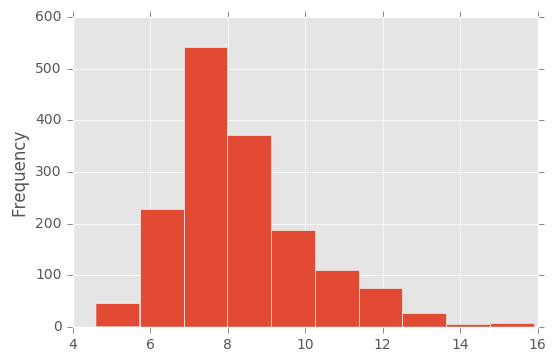

In [51]:
df['fixed acidity'].plot.hist()

Scatter plot the fixed acidity vs. volatile acidity:

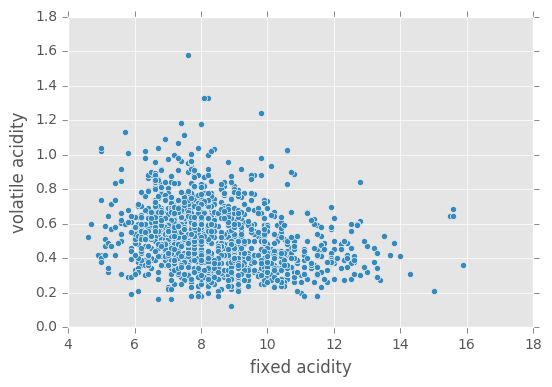

In [52]:
df.plot.scatter(x='fixed acidity', y='volatile acidity')

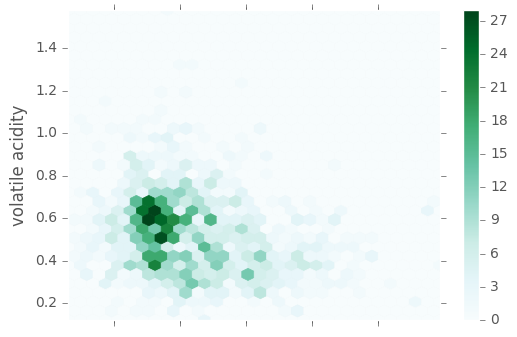

In [53]:
df.plot.hexbin(x='fixed acidity', y='volatile acidity', gridsize=30)

Create a box-and-whisker plot of multiple columns:

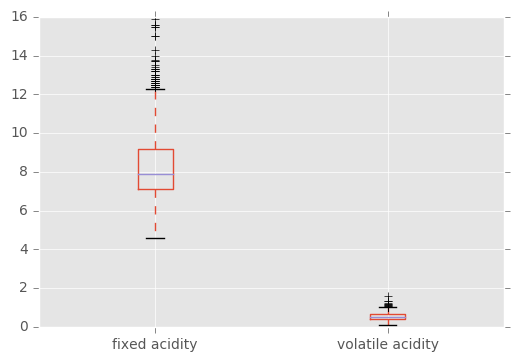

In [55]:
df[['fixed acidity', 'volatile acidity']].plot.box()